Opening file: ../data/processed/2020/fire_24462610.hdf5

--- File Structure ---
data {'fire_name': 'fire_24462610', 'img_dates': array(['2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02',
       '2020-09-03', '2020-09-04', '2020-09-05', '2020-09-06',
       '2020-09-07', '2020-09-08', '2020-09-09', '2020-09-10',
       '2020-09-11', '2020-09-12', '2020-09-13', '2020-09-14',
       '2020-09-15', '2020-09-16', '2020-09-17', '2020-09-18',
       '2020-09-19', '2020-09-20', '2020-09-21', '2020-09-22',
       '2020-09-23', '2020-09-24', '2020-09-25', '2020-09-26',
       '2020-09-27', '2020-09-28', '2020-09-29', '2020-09-30',
       '2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04'],
      dtype=object), 'lnglat': array([-122.9390584 ,   43.36803429]), 'year': 2020}

--- Dataset Info ---
Dataset 'data' found.
Shape (T, C, H, W): (36, 23, 297, 219)
Dtype: float32

--- Visualizing Channels at Time Step 10 ---


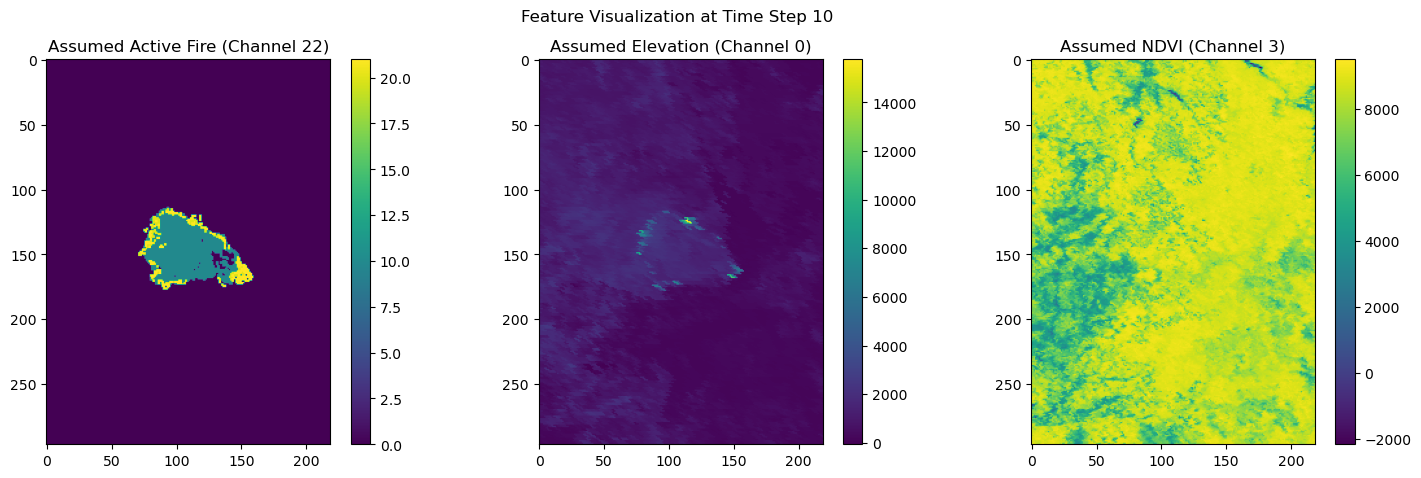


--- Checking for NaN Values ---
No NaN values found in the checked subset.

File closed.


In [ ]:
{
 "cells": [
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "import h5py\n",
    "import numpy as np\n",
    "import matplotlib.pyplot as plt\n",
    "import os\n",
    "\n",
    "# --- 1. Open a random HDF5 file ---\n",
    "file_path = '../data/processed/2020/fire_24462610.hdf5'\n",
    "print(f\"Opening file: {file_path}\")\n",
    "\n",
    "try:\n",
    "    file = h5py.File(file_path, 'r')\n",
    "except FileNotFoundError:\n",
    "    print(f\"Error: File not found. Make sure the path is correct.\")\n",
    "\n",
    "# --- 2. Print the file's tree structure ---\n",
    "print(\"\\n--- File Structure ---\")\n",
    "def print_structure(name, obj):\n",
    "    print(name, dict(obj.attrs))\n",
    "file.visititems(print_structure)\n",
    "\n",
    "# --- 3. Read dataset, check shape and dtype ---\n",
    "print(\"\\n--- Dataset Info ---\")\n",
    "if 'data' in file:\n",
    "    dataset = file['data']\n",
    "    print(f\"Dataset 'data' found.\")\n",
    "    print(f\"Shape (T, C, H, W): {dataset.shape}\")\n",
    "    print(f\"Dtype: {dataset.dtype}\")\n",
    "\n",
    "    # --- 4. Visualize key channels at a specific time step ---\n",
    "    time_step_to_show = 10 # Use a time step where fire is active\n",
    "    print(f\"\\n--- Visualizing Channels at Time Step {time_step_to_show} ---\")\n",
    "\n",
    "    # NOTE: Channel numbers are 1-based from the paper, indices are 0-based.\n",
    "    channels_to_visualize = {\n",
    "        'Active Fire Mask (Channel 1)': 0,\n",
    "        'Elevation (Channel 22)': 21,\n",
    "        'NDVI (Channel 5)': 4\n",
    "    }\n",
    "\n",
    "    plt.figure(figsize=(18, 5))\n",
    "    for i, (title, channel_idx) in enumerate(channels_to_visualize.items()):\n",
    "        plt.subplot(1, 3, i + 1)\n",
    "        channel_data = dataset[time_step_to_show, channel_idx, :, :]\n",
    "        plt.imshow(channel_data, cmap='viridis')\n",
    "        plt.title(title)\n",
    "        plt.colorbar()\n",
    "    plt.suptitle(f'Feature Visualization at Time Step {time_step_to_show}')\n",
    "    plt.show()\n",
    "\n",
    "    # --- 5. Check for NaN values ---\n",
    "    print(\"\\n--- Checking for NaN Values ---\")\n",
    "    sample_data = dataset[:12, :, :, :] # Check first 12 time steps\n",
    "    nan_count = np.isnan(sample_data).sum()\n",
    "    if nan_count > 0:\n",
    "        print(f\"Found {nan_count} NaN values in the first {sample_data.shape[0]} time steps.\")\n",
    "    else:\n",
    "        print(\"No NaN values found in the checked subset.\")\n",
    "\n",
    "else:\n",
    "    print(\"Dataset 'data' not found in the file.\")\n",
    "\n",
    "# --- Close the file ---\n",
    "file.close()\n",
    "print(\"\\nFile closed.\")\n"
   ]
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.9.7"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 4
}